In [1]:
import xml.etree.ElementTree as ET
import csv
import pandas as pd



# Read the CSV file into a pandas DataFrame
df = pd.read_csv("output_sleep_data.csv")

# Convert the 'Start Time' and 'End Time' columns to datetime with timezone
df['Start Time'] = pd.to_datetime(df['Start Time']).dt.tz_localize(None)
df['End Time'] = pd.to_datetime(df['End Time']).dt.tz_localize(None)

# Increase 'End Time' by 3 hours if wake-up time is exactly 6:30
mask = ((df['End Time'].dt.strftime('%H:%M:%S') >= '06:30:00') & (df['End Time'].dt.strftime('%H:%M:%S') <= '06:31:00'))
df.loc[mask, 'End Time'] += pd.Timedelta(hours=3)

# Calculate sleep duration for each record
df['Date'] = df['Start Time'].dt.date
df = df.groupby('Date').agg({'Start Time': 'min', 'End Time': 'max', 'Category Value': 'last'})
df['Sleep Duration'] = (df['End Time'] - df['Start Time']).dt.total_seconds() / 3600  # Convert seconds to hours

# Create a new column for the date

# Filter entries based on the time condition
df = df[((df['Start Time'].dt.hour < 14) & (df['End Time'].dt.hour < 22)) | (df['End Time'].dt.hour >= 22)]
df = df[(df['Sleep Duration'] >= 2) & (df['Sleep Duration'] <= 15)]

# Display night-by-night sleep data
night_by_night_data = df.groupby('Date').agg({'Start Time': 'min', 'End Time': 'max', 'Category Value': 'last', 'Sleep Duration': 'sum'})
display(night_by_night_data)


,Start Time,End Time,Category Value,Sleep Duration
Date,,,,
2018-08-31,2018-08-31 00:11:32,2018-08-31 08:00:36,HKCategoryValueSleepAnalysisInBed,7.817778
2018-09-01,2018-09-01 00:00:00,2018-09-01 08:00:56,HKCategoryValueSleepAnalysisInBed,8.015556
2018-09-02,2018-09-02 00:12:56,2018-09-02 08:00:14,HKCategoryValueSleepAnalysisInBed,7.788333
2018-09-03,2018-09-03 00:16:24,2018-09-03 08:00:20,HKCategoryValueSleepAnalysisInBed,7.732222
2018-09-04,2018-09-04 00:13:20,2018-09-04 08:01:59,HKCategoryValueSleepAnalysisInBed,7.810833
...,...,...,...,...
2023-12-04,2023-12-04 00:58:39,2023-12-04 08:02:26,HKCategoryValueSleepAnalysisInBed,7.063056
2023-12-06,2023-12-06 00:14:51,2023-12-06 10:12:51,HKCategoryValueSleepAnalysisInBed,9.966667
2023-12-07,2023-12-07 00:58:27,2023-12-07 09:31:06,HKCategoryValueSleepAnalysisInBed,8.544167


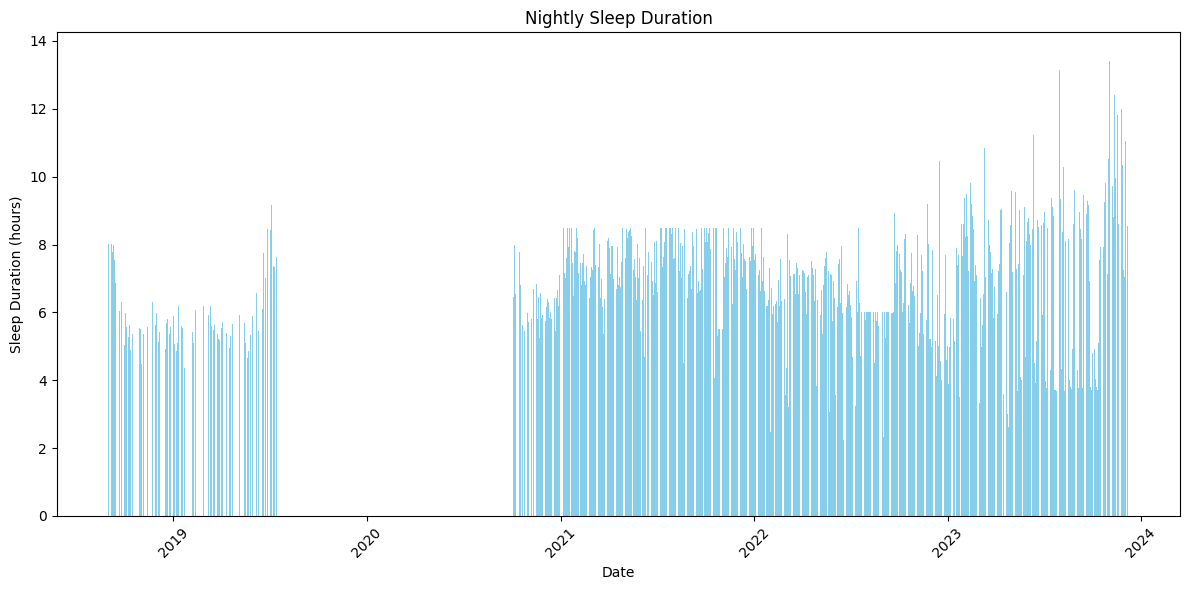

In [2]:
import matplotlib.pyplot as plt

# Assuming you have already executed the previous code to get night_by_night_data

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(night_by_night_data.index, night_by_night_data['Sleep Duration'], color='skyblue')
plt.title('Nightly Sleep Duration')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#display(night_by_night_data[night_by_night_data['Year'] == 2022] & [night_by_night_data['Month'] == 5] )


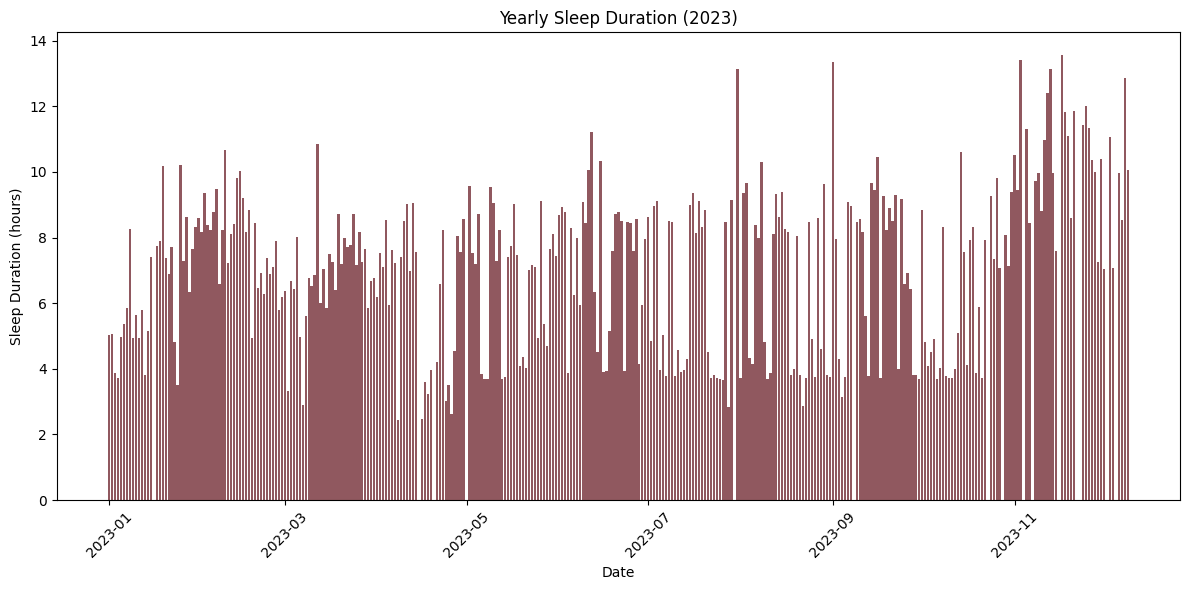

In [3]:
import matplotlib.pyplot as plt

# Assuming you have already executed the previous code to get night_by_night_data

# Convert the 'Date' column to datetime
night_by_night_data['Date'] = pd.to_datetime(night_by_night_data.index)

# Extracting the year from the 'Date' column
night_by_night_data['Year'] = night_by_night_data['Date'].dt.year

# Creating a bar graph for sleep duration year by year
plt.figure(figsize=(12, 6))
for year in range(2018, 2024):
    year_data = night_by_night_data[night_by_night_data['Year'] == 2023]
    plt.bar(year_data['Date'], year_data['Sleep Duration'], label=str(year), alpha=0.7)

plt.title('Yearly Sleep Duration (2023)')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


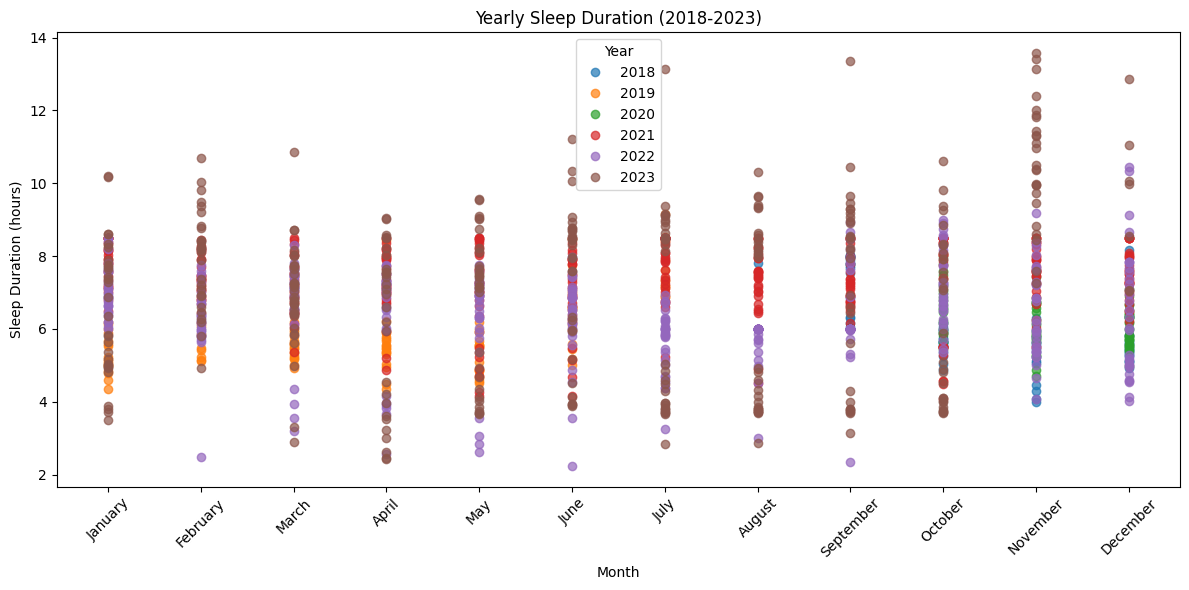

In [4]:
import matplotlib.pyplot as plt
import calendar

# Assuming you have a DataFrame 'night_by_night_data' with a datetime index
# Convert the index to datetime (if not already)
night_by_night_data.index = pd.to_datetime(night_by_night_data.index)

# Extracting the year and month from the index
night_by_night_data['Year'] = night_by_night_data.index.year
night_by_night_data['Month'] = night_by_night_data.index.month

# Creating a line graph for sleep duration year by year with markers only
plt.figure(figsize=(12, 6))
for year in range(2018, 2024):
    year_data = night_by_night_data[night_by_night_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sleep Duration'], 'o', label=str(year), alpha=0.7)

plt.title('Yearly Sleep Duration (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()
#display(night_by_night_data[(night_by_night_data['Year'] == 2022) & (night_by_night_data['Month'] == 5)] )


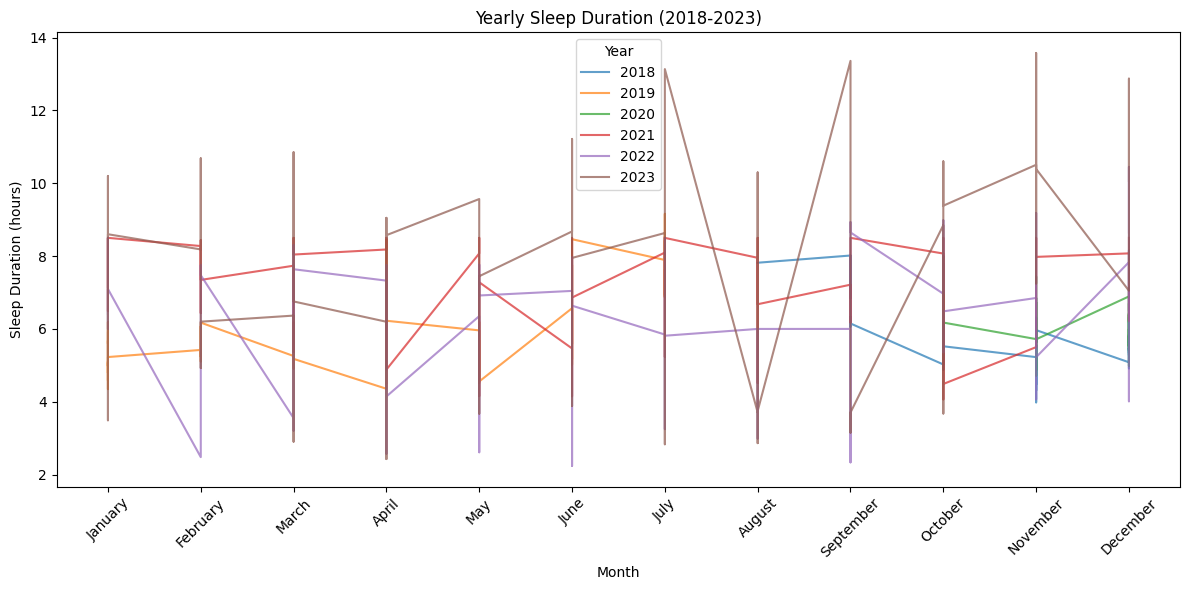

In [5]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'night_by_night_data' with a datetime index

# Creating a line graph for sleep duration year by year
plt.figure(figsize=(12, 6))
for year in range(2018, 2024):
    year_data = night_by_night_data[night_by_night_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sleep Duration'], label=str(year), alpha=0.7)

plt.title('Yearly Sleep Duration (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


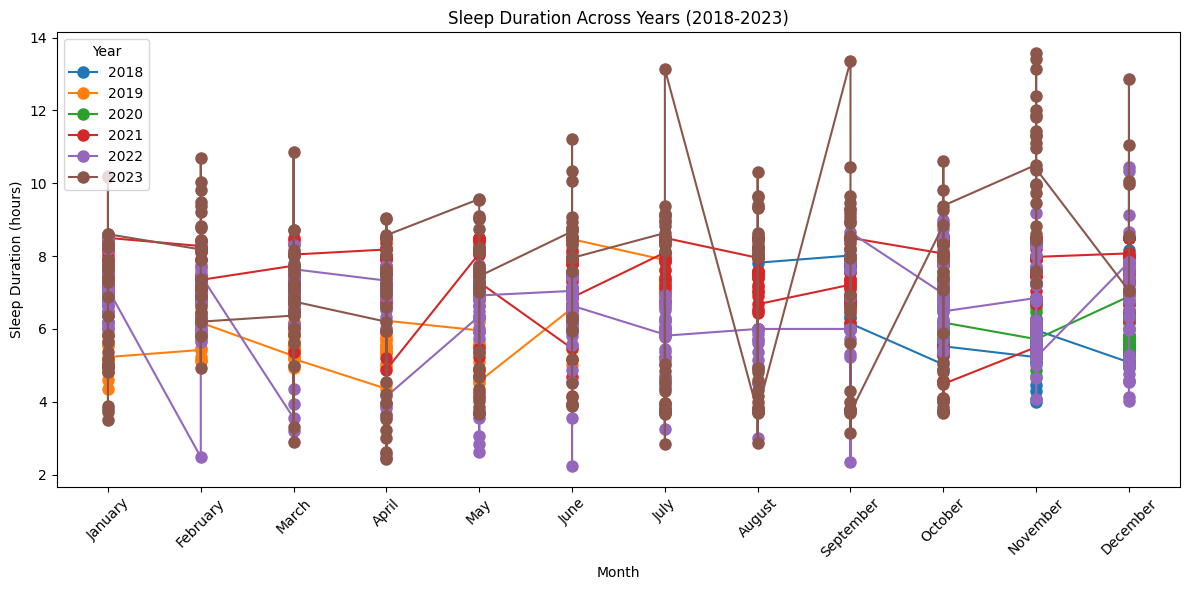

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data



# Creating a line chart for sleep duration across years
plt.figure(figsize=(12, 6))

# Iterate over each year and plot a line
for year in night_by_night_data['Year'].unique():
    year_data = night_by_night_data[night_by_night_data['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sleep Duration'], label=str(year), marker='o', markersize=8)

plt.title('Sleep Duration Across Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


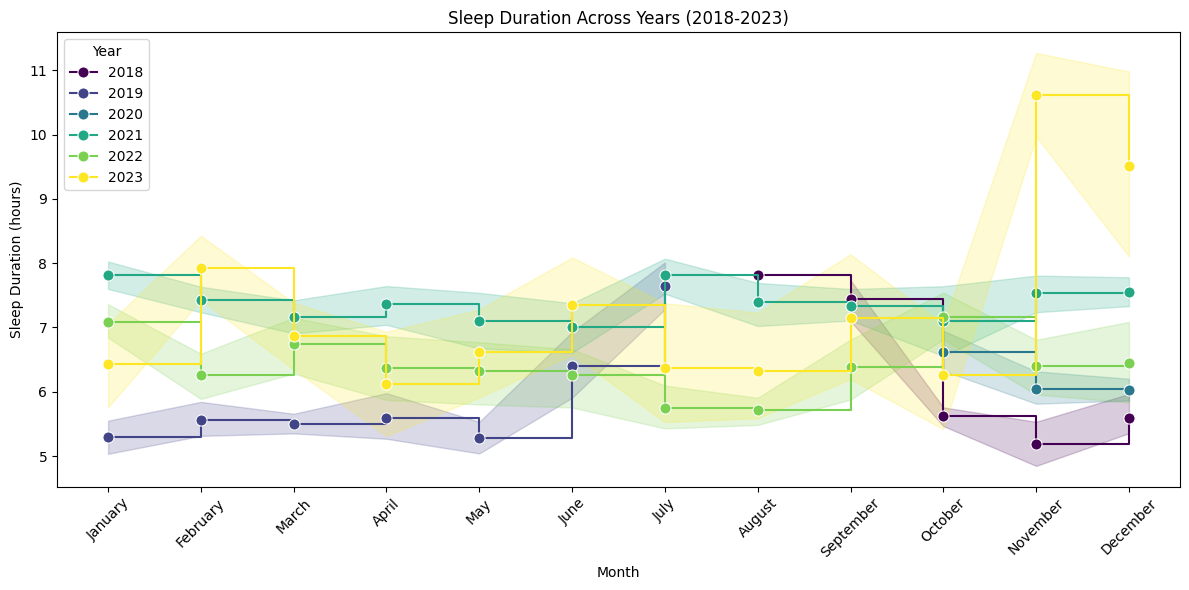

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data



# Creating a line chart for sleep duration across years without connecting lines
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sleep Duration', hue='Year', data=night_by_night_data, marker='o', markersize=8, palette='viridis', drawstyle='steps-post')

plt.title('Sleep Duration Across Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


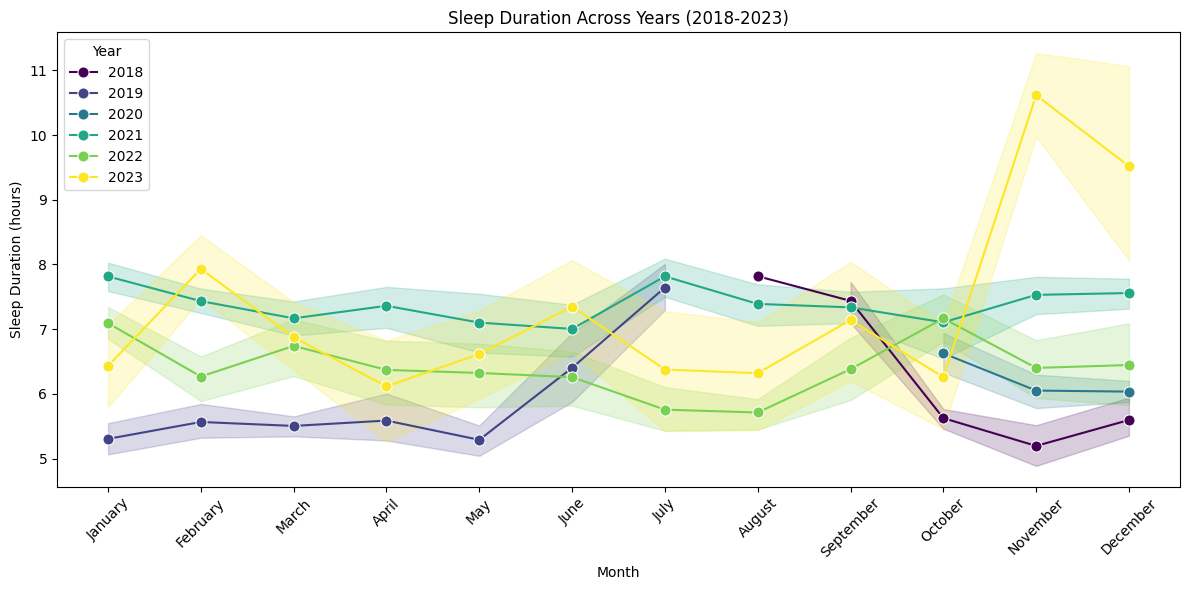

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



# Creating a line chart for sleep duration across years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sleep Duration', hue='Year', data=night_by_night_data, marker='o', markersize=8, palette='viridis')

plt.title('Sleep Duration Across Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'night_by_night_data' DataFrame with 'Start Time' and 'End Time' columns

# Extract year from 'Date'
#night_by_night_data['Year'] = night_by_night_data.index.year

# Calculate average sleep duration and bedtime/waketime for each year
average_sleep_data = night_by_night_data.groupby('Year').agg({
    'Sleep Duration': 'mean',
    'Start Time': 'mean',  # Assuming 'Start Time' is the bedtime
    'End Time': 'mean'     # Assuming 'End Time' is the waketime
}).reset_index()

# Set up subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot average sleep duration
sns.lineplot(x='Year', y='Sleep Duration', data=average_sleep_data, ax=axes[0])
axes[0].set_title('Average Sleep Duration Over the Years')

# Plot average bedtime and waketime
sns.lineplot(x='Year', y='Start Time', label='Bedtime', data=average_sleep_data, ax=axes[1])
sns.lineplot(x='Year', y='End Time', label='Waketime', data=average_sleep_data, ax=axes[1])
axes[1].set_title('Average Bedtime and Waketime Over the Years')

# Customize the plots
axes[0].set_ylabel('Average Sleep Duration (hours)')
axes[1].set_ylabel('Time (24-hour format)')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()


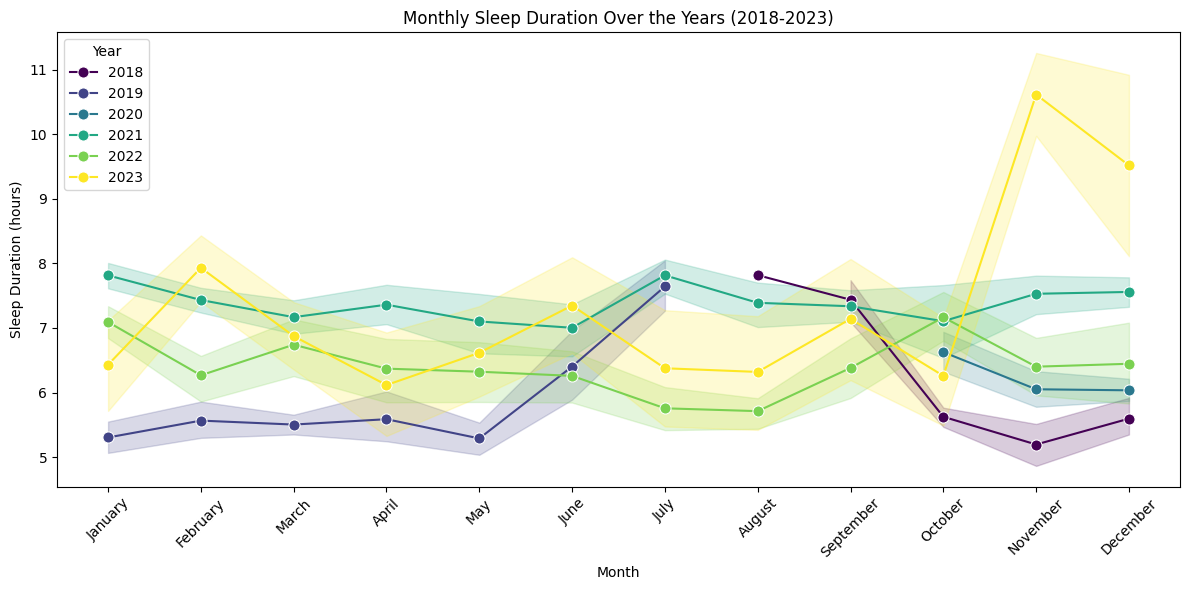

In [9]:
import xml.etree.ElementTree as ET
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar  # Add this import statement




# Creating a line chart for sleep duration year by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sleep Duration', hue='Year', data=night_by_night_data, marker='o', markersize=8, palette='viridis')

plt.title('Monthly Sleep Duration Over the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


In [10]:
display(night_by_night_data)


,Start Time,End Time,Category Value,Sleep Duration,Date,Year,Month
Date,,,,,,,
2018-08-31,2018-08-31 00:11:32,2018-08-31 08:00:36,HKCategoryValueSleepAnalysisInBed,7.817778,2018-08-31,2018,8
2018-09-01,2018-09-01 00:00:00,2018-09-01 08:00:56,HKCategoryValueSleepAnalysisInBed,8.015556,2018-09-01,2018,9
2018-09-02,2018-09-02 00:12:56,2018-09-02 08:00:14,HKCategoryValueSleepAnalysisInBed,7.788333,2018-09-02,2018,9
2018-09-03,2018-09-03 00:16:24,2018-09-03 08:00:20,HKCategoryValueSleepAnalysisInBed,7.732222,2018-09-03,2018,9
2018-09-04,2018-09-04 00:13:20,2018-09-04 08:01:59,HKCategoryValueSleepAnalysisInBed,7.810833,2018-09-04,2018,9
...,...,...,...,...,...,...,...
2023-12-04,2023-12-04 00:58:39,2023-12-04 08:02:26,HKCategoryValueSleepAnalysisInBed,7.063056,2023-12-04,2023,12
2023-12-06,2023-12-06 00:14:51,2023-12-06 10:12:51,HKCategoryValueSleepAnalysisInBed,9.966667,2023-12-06,2023,12
2023-12-07,2023-12-07 00:58:27,2023-12-07 09:31:06,HKCategoryValueSleepAnalysisInBed,8.544167,2023-12-07,2023,12


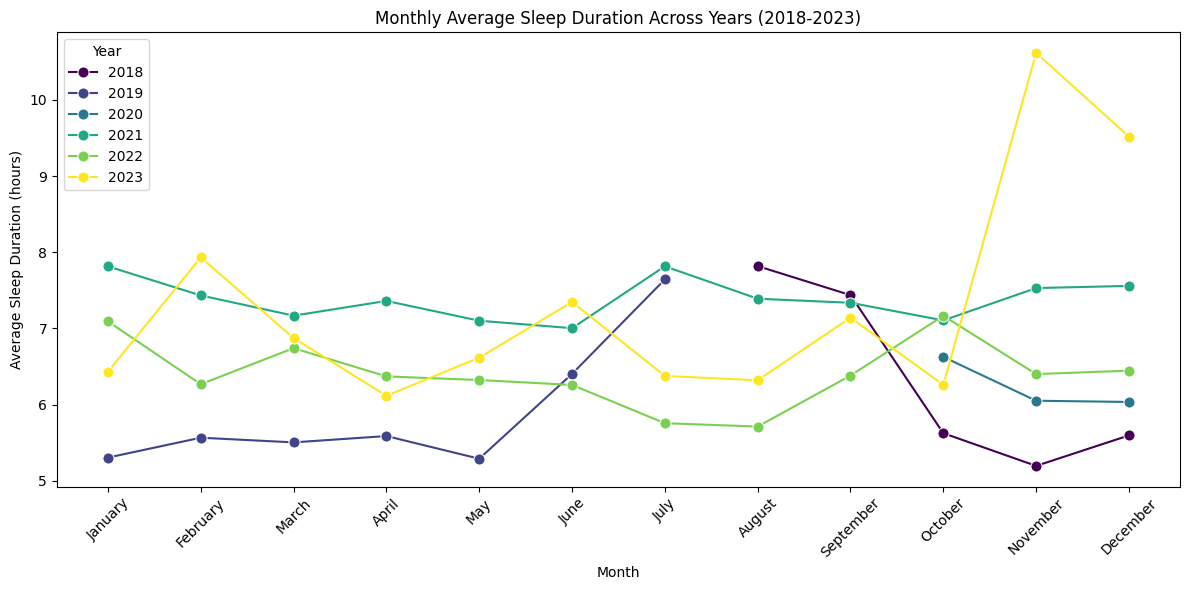

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



# Calculate the average sleep duration for each month across all years
monthly_average_data = night_by_night_data.groupby(['Year', 'Month']).agg({'Sleep Duration': 'mean'}).reset_index()

# Creating a line chart for monthly average sleep duration across years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sleep Duration', hue='Year', data=monthly_average_data, marker='o', markersize=8, palette='viridis')

plt.title('Monthly Average Sleep Duration Across Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Average Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


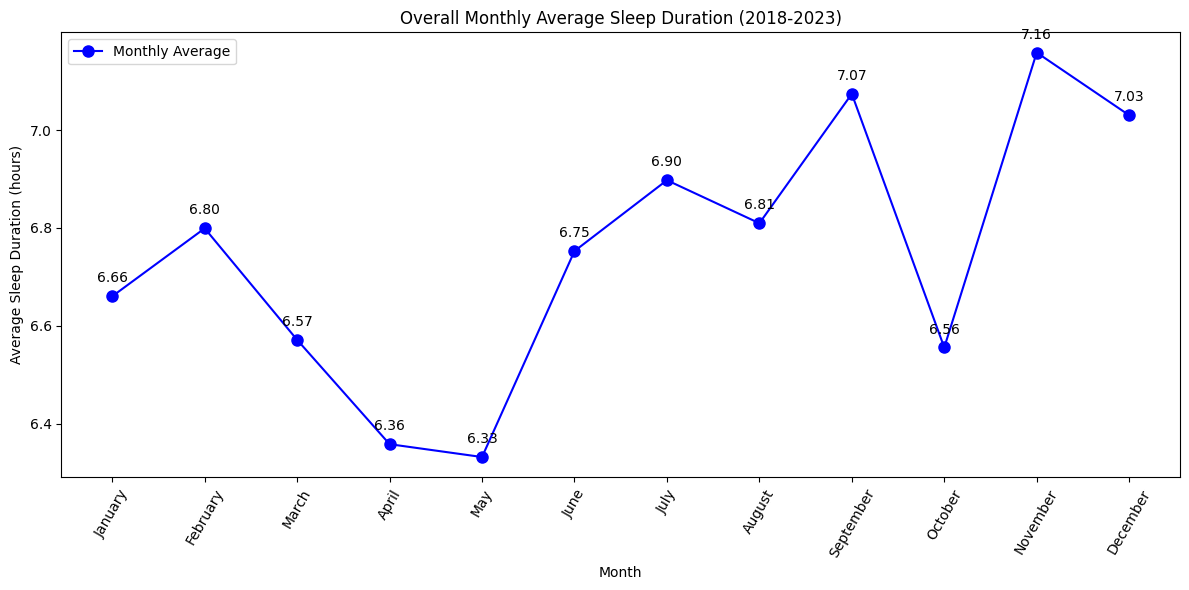

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data



# Calculate the average sleep duration for each month across all years
monthly_average_data = night_by_night_data.groupby(['Year', 'Month']).agg({'Sleep Duration': 'mean'}).reset_index()

# Calculate the overall average sleep duration for each month across all years
overall_monthly_average = monthly_average_data.groupby('Month')['Sleep Duration'].mean().reset_index()

# Creating a line chart for overall monthly average sleep duration with data points
plt.figure(figsize=(12, 6))
plt.plot(overall_monthly_average['Month'], overall_monthly_average['Sleep Duration'], marker='o', markersize=8, color='blue', linestyle='-', label='Monthly Average')

# Display data points on the y-axis
for i, txt in enumerate(overall_monthly_average['Sleep Duration']):
    plt.annotate(f'{txt:.2f}', (overall_monthly_average['Month'][i], txt), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Overall Monthly Average Sleep Duration (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=60)
plt.tight_layout()
plt.legend()
plt.show()


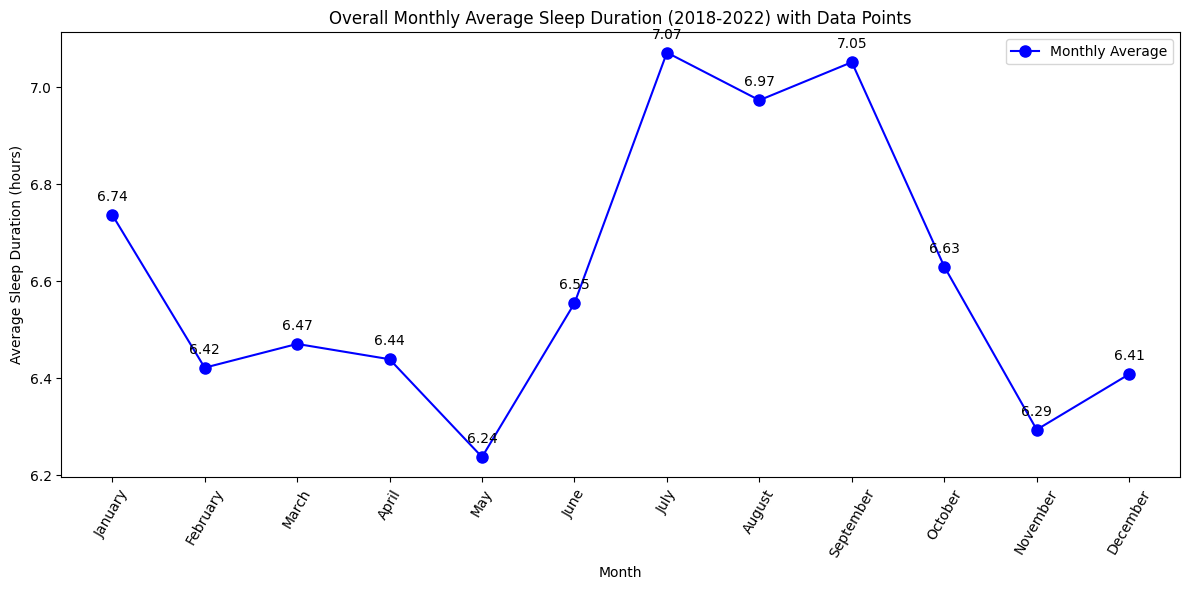

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data



# Exclude the year 2023 from the data
filtered_data = night_by_night_data[night_by_night_data['Year'] != 2023]

# Calculate the average sleep duration for each month across all years (excluding 2023)
monthly_average_data = filtered_data.groupby(['Year', 'Month']).agg({'Sleep Duration': 'mean'}).reset_index()

# Calculate the overall average sleep duration for each month across all years (excluding 2023)
overall_monthly_average = monthly_average_data.groupby('Month')['Sleep Duration'].mean().reset_index()

# Creating a line chart for overall monthly average sleep duration with data points
plt.figure(figsize=(12, 6))
plt.plot(overall_monthly_average['Month'], overall_monthly_average['Sleep Duration'], marker='o', markersize=8, color='blue', linestyle='-', label='Monthly Average')

# Display data points on the y-axis
for i, txt in enumerate(overall_monthly_average['Sleep Duration']):
    plt.annotate(f'{txt:.2f}', (overall_monthly_average['Month'][i], txt), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Overall Monthly Average Sleep Duration (2018-2022) with Data Points')
plt.xlabel('Month')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=60)
plt.tight_layout()
plt.legend()
plt.show()


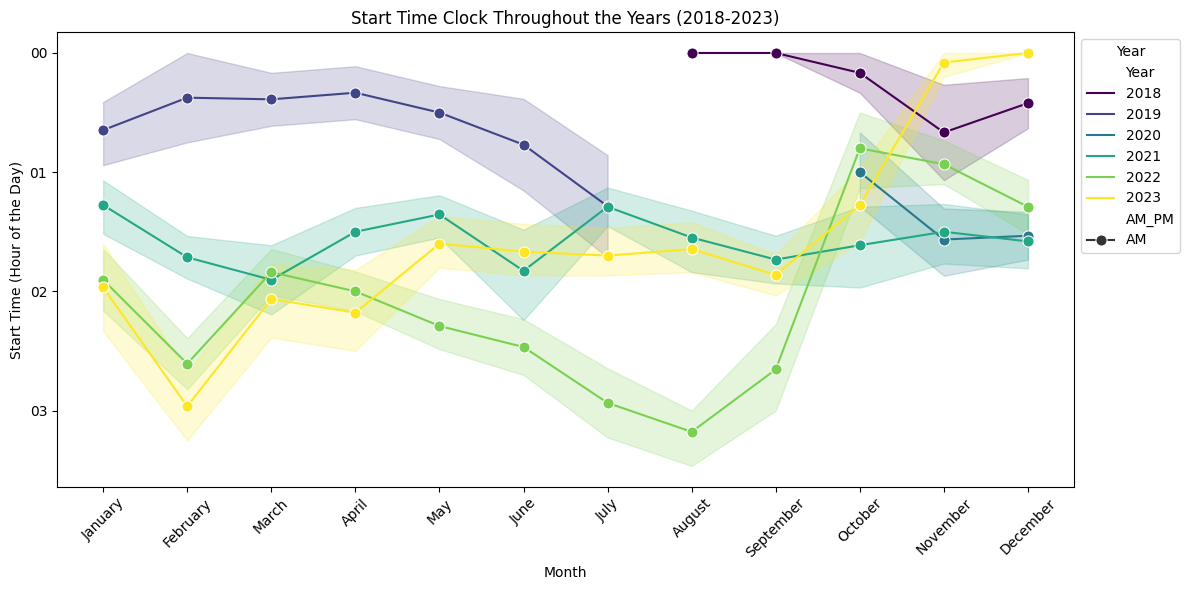

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Convert the 'Date' column to datetime
night_by_night_data['Date'] = pd.to_datetime(night_by_night_data.index)

# Extracting the year, month, and hour from the 'Start Time' column
night_by_night_data['Year'] = night_by_night_data['Date'].dt.year
night_by_night_data['Month'] = night_by_night_data['Date'].dt.month
night_by_night_data['Hour'] = night_by_night_data['Start Time'].dt.hour

# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['Start Time'].dt.strftime('%p')
night_by_night_data['Hour_24S'] = night_by_night_data['Start Time'].dt.strftime('%H')

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24S', hue='Year', style='AM_PM', markers=True, 
    data=night_by_night_data, markersize=8, palette='viridis'
)

plt.title('Start Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour of the Day)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.tight_layout()
plt.show()


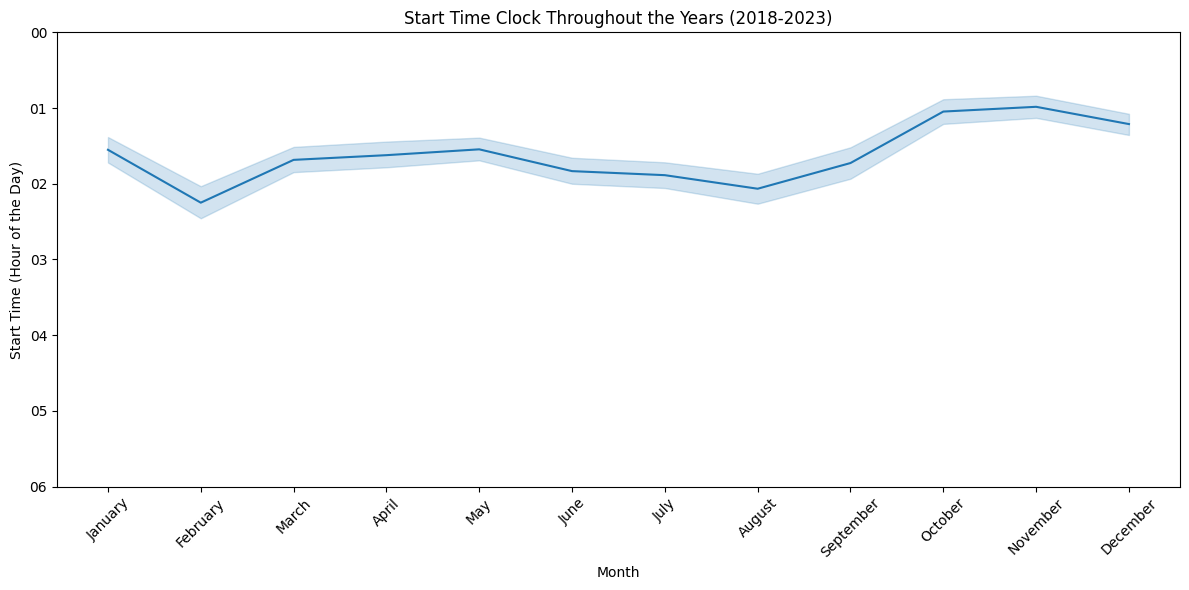

In [15]:
# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['Start Time'].dt.strftime('%p')
night_by_night_data['Hour_24S'] = night_by_night_data['Start Time'].dt.strftime('%H')

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24S',  markers=True, 
    data=night_by_night_data, markersize=8, )

plt.title('Start Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour of the Day)')
#plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.yticks(range(0, 7))
plt.tight_layout()
plt.show()


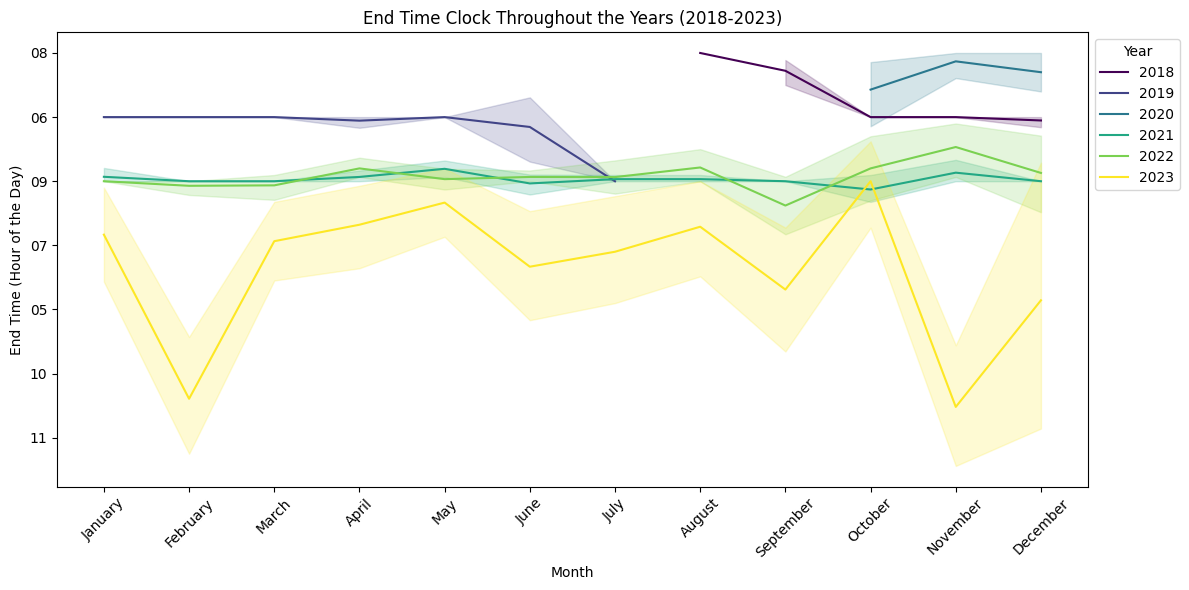

In [16]:
# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['End Time'].dt.strftime('%p')
night_by_night_data['Hour_24'] = night_by_night_data['End Time'].dt.strftime('%H')

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24', hue='Year',  markers=True, 
    data=night_by_night_data, markersize=8, palette='viridis'
)

plt.title('End Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('End Time (Hour of the Day)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.yticks(range(0, 7))
plt.tight_layout()
plt.show()


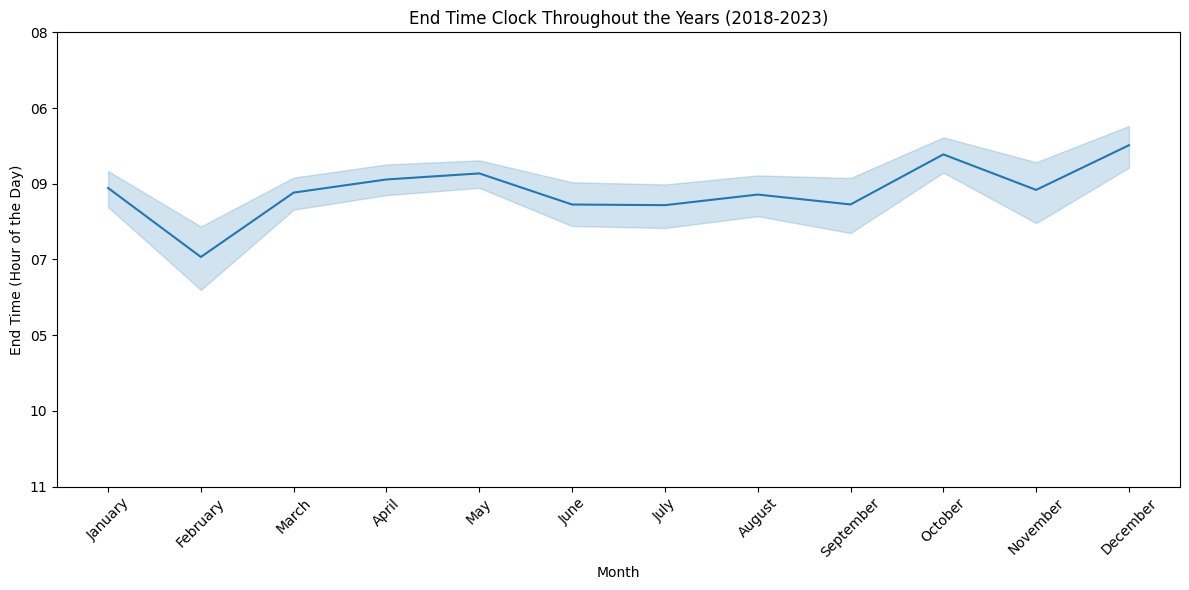

In [17]:
# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['End Time'].dt.strftime('%p')
night_by_night_data['Hour_24'] = night_by_night_data['End Time'].dt.strftime('%H')

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24',  markers=True, 
    data=night_by_night_data, markersize=8, )

plt.title('End Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('End Time (Hour of the Day)')
#plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)
plt.yticks(range(0, 7))
plt.tight_layout()
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['End Time'].dt.strftime('%p')
night_by_night_data['Hour_24'] = night_by_night_data['End Time'].dt.hour + night_by_night_data['End Time'].dt.minute / 60

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24', hue='Year',  markers=True, 
    data=night_by_night_data, markersize=8, palette='viridis'
)

plt.title('End Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('End Time (Hour:Minute)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)

# Format y-axis to show only hours
plt.yticks(range(0, 12))

plt.tight_layout()
plt.show()


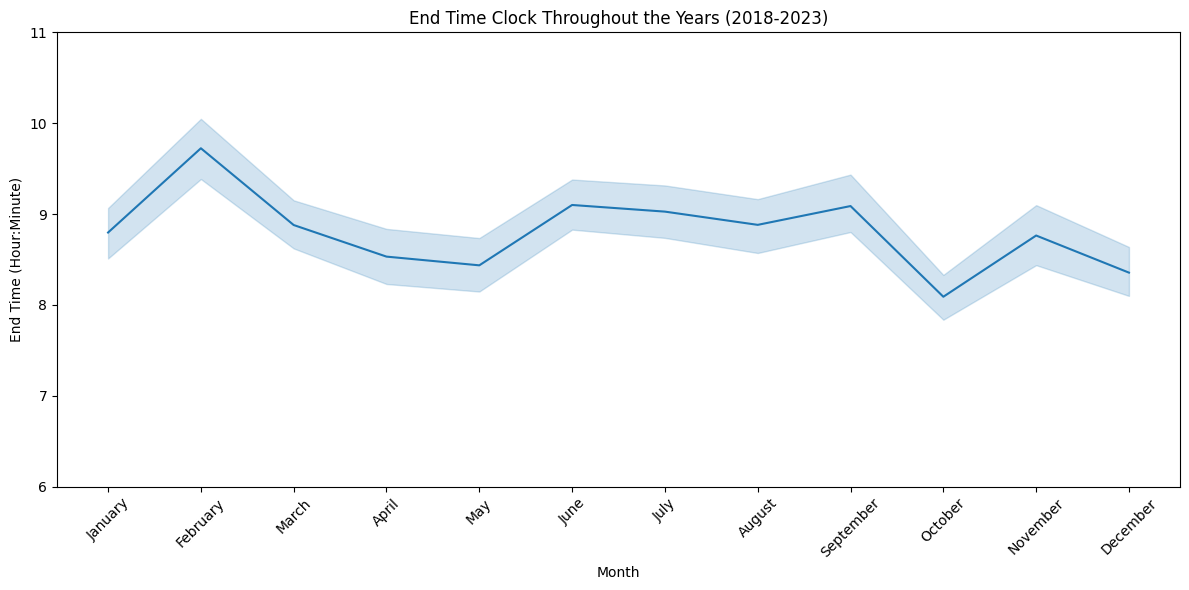

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['End Time'].dt.strftime('%p')
night_by_night_data['Hour_24'] = night_by_night_data['End Time'].dt.hour + night_by_night_data['End Time'].dt.minute / 60

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24',   markers=True, 
    data=night_by_night_data, markersize=8
)

plt.title('End Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('End Time (Hour:Minute)')

plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)

# Format y-axis to show only hours
plt.yticks(range(6, 12))

plt.tight_layout()
plt.show()


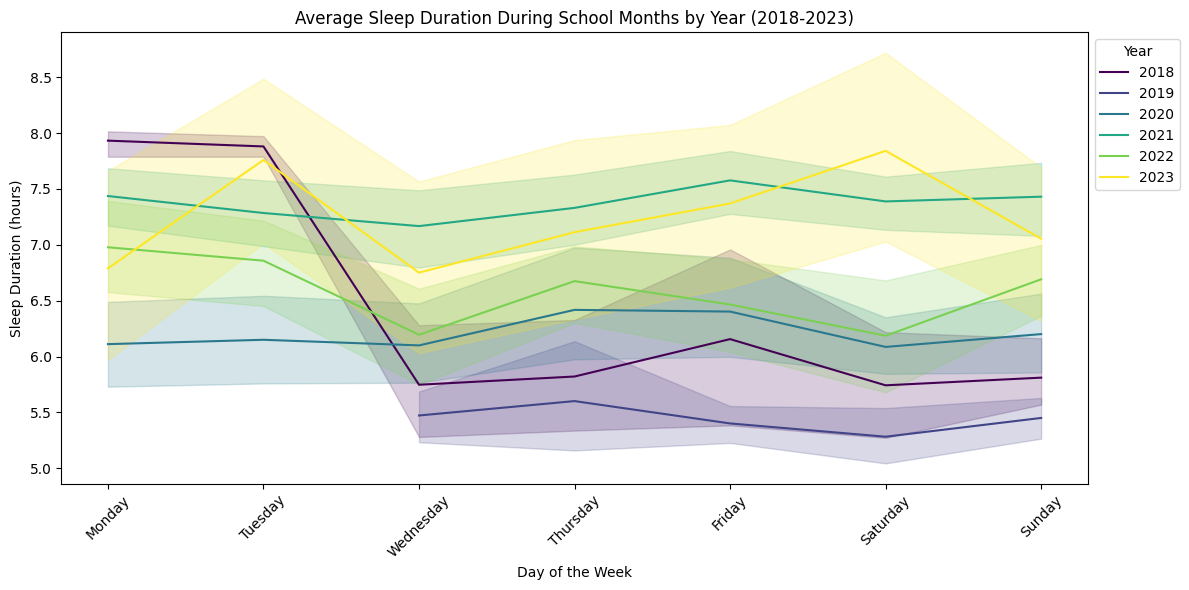

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Convert the 'Date' column to datetime
night_by_night_data['Date'] = pd.to_datetime(night_by_night_data.index)

# Extracting the year, month, day of the week, and sleep duration
night_by_night_data['Year'] = night_by_night_data['Date'].dt.year
night_by_night_data['Month'] = night_by_night_data['Date'].dt.month
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['Sleep_Duration'] = night_by_night_data['Sleep Duration']

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 9) | (night_by_night_data['Month'] <= 5)]

# Creating a line chart for average sleep duration during school months by year
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Sleep_Duration', hue='Year',
    data=school_months_data, markers=True, markersize=4, palette='viridis'
)

plt.title('Average Sleep Duration During School Months by Year (2018-2023)')
plt.xlabel('Day of the Week')
plt.ylabel('Sleep Duration (hours)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.tight_layout()
plt.show()


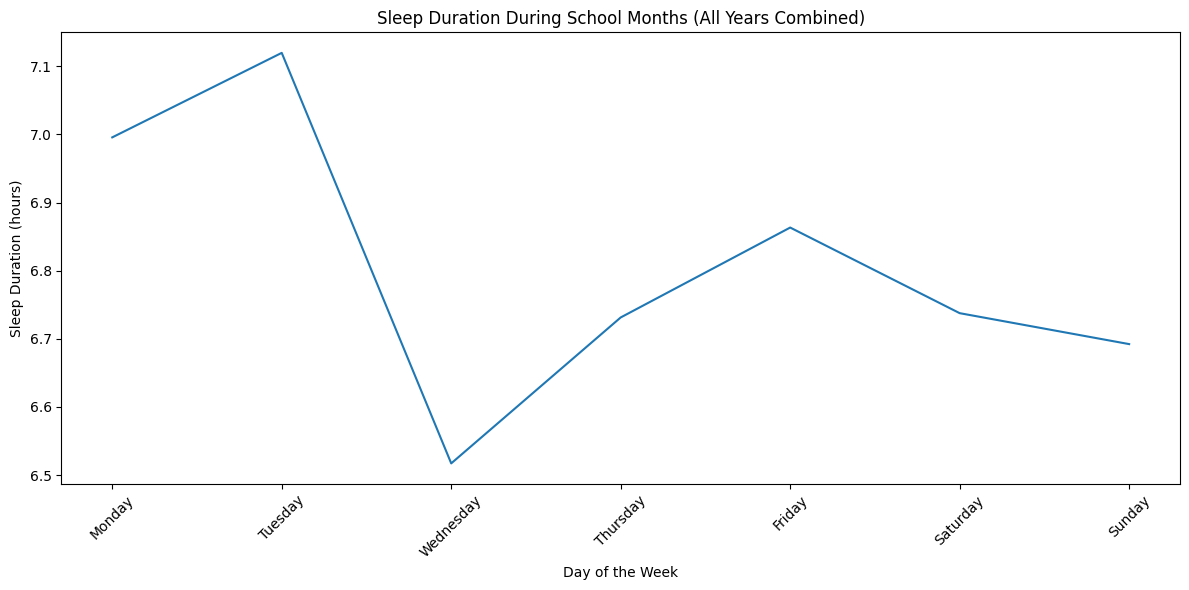

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Convert the 'Date' column to datetime
night_by_night_data['Date'] = pd.to_datetime(night_by_night_data.index)

# Extracting the day of the week and sleep duration
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['Sleep_Duration'] = night_by_night_data['Sleep Duration']

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 9) | (night_by_night_data['Month'] <= 6)]

# Creating a line chart for sleep duration during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Sleep_Duration',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('Sleep Duration During School Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.tight_layout()
plt.show()


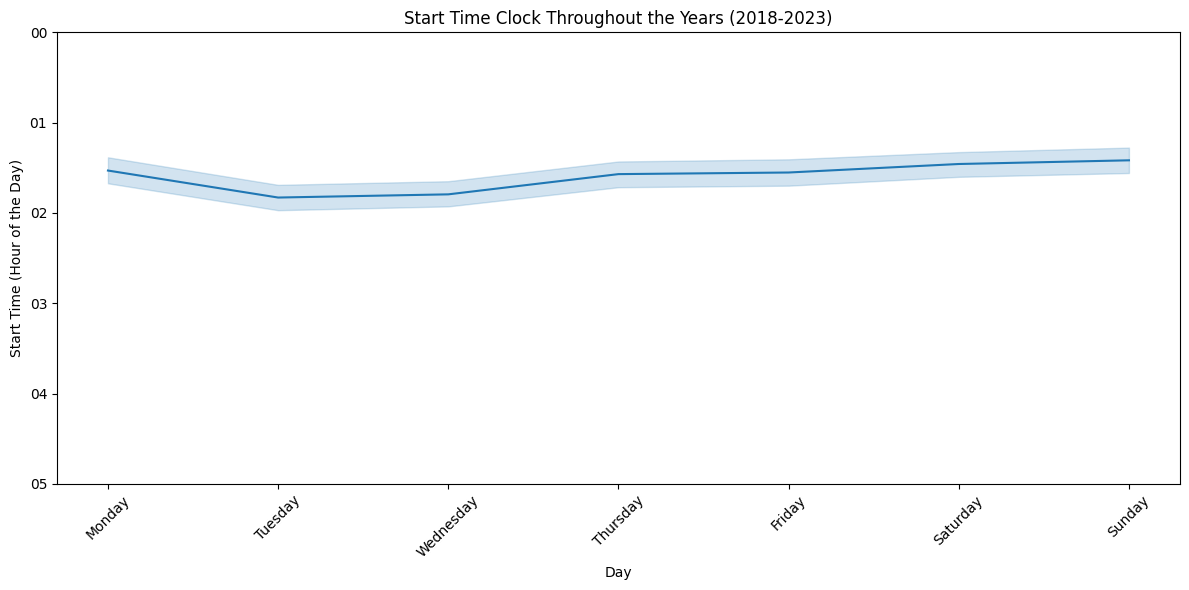

,Start Time,End Time,Category Value,Sleep Duration,Date,Year,Month,Hour,AM_PM,Hour_24S,Hour_24,Day_of_Week,Sleep_Duration
Date,,,,,,,,,,,,,
2018-08-31,2018-08-31 00:11:32,2018-08-31 08:00:36,HKCategoryValueSleepAnalysisInBed,7.817778,2018-08-31,2018,8,0,AM,00,8.000000,Friday,7.817778
2018-09-01,2018-09-01 00:00:00,2018-09-01 08:00:56,HKCategoryValueSleepAnalysisInBed,8.015556,2018-09-01,2018,9,0,AM,00,8.000000,Saturday,8.015556
2018-09-02,2018-09-02 00:12:56,2018-09-02 08:00:14,HKCategoryValueSleepAnalysisInBed,7.788333,2018-09-02,2018,9,0,AM,00,8.000000,Sunday,7.788333
2018-09-03,2018-09-03 00:16:24,2018-09-03 08:00:20,HKCategoryValueSleepAnalysisInBed,7.732222,2018-09-03,2018,9,0,AM,00,8.000000,Monday,7.732222
2018-09-04,2018-09-04 00:13:20,2018-09-04 08:01:59,HKCategoryValueSleepAnalysisInBed,7.810833,2018-09-04,2018,9,0,AM,00,8.016667,Tuesday,7.810833
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,2023-12-04 00:58:39,2023-12-04 08:02:26,HKCategoryValueSleepAnalysisInBed,7.063056,2023-12-04,2023,12,0,AM,00,8.033333,Monday,7.063056
2023-12-06,2023-12-06 00:14:51,2023-12-06 10:12:51,HKCategoryValueSleepAnalysisInBed,9.966667,2023-12-06,2023,12,0,AM,00,10.200000,Wednesday,9.966667
2023-12-07,2023-12-07 00:58:27,2023-12-07 09:31:06,HKCategoryValueSleepAnalysisInBed,8.544167,2023-12-07,2023,12,0,AM,00,9.516667,Thursday,8.544167


In [21]:
# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Hour_24S',  markers=True, 
    data=night_by_night_data, markersize=8, )

plt.title('Start Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Day')
plt.ylabel('Start Time (Hour of the Day)')
#plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()
display(night_by_night_data)

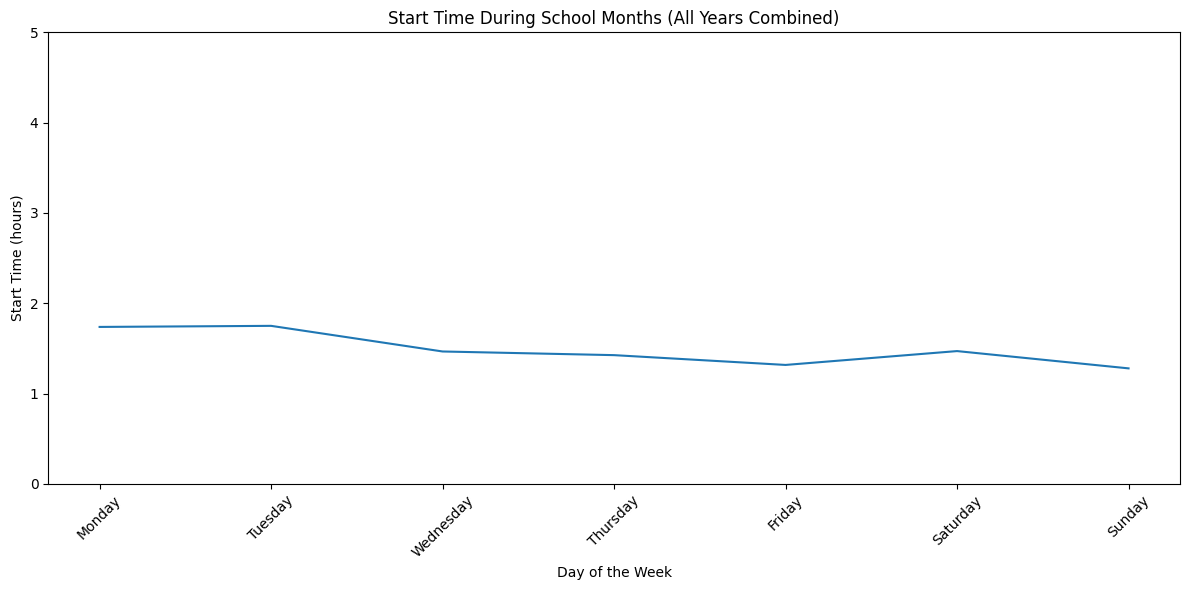

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Extracting the day of the week and start time in hours
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['Start_Hour'] = night_by_night_data['Start Time'].dt.hour

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 9) | (night_by_night_data['Month'] <= 5)]

# Creating a line chart for start time during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Start_Hour',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('Start Time During School Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()


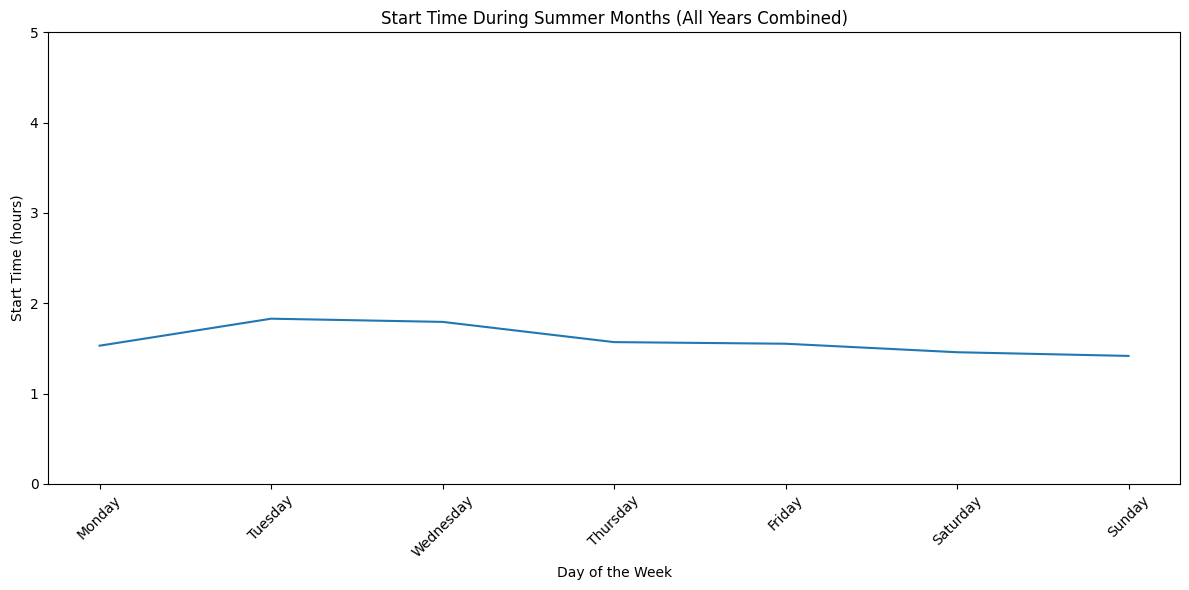

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Extracting the day of the week and start time in hours
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['Start_Hour'] = night_by_night_data['Start Time'].dt.hour

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 6) | (night_by_night_data['Month'] <= 10)]

# Creating a line chart for start time during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Start_Hour',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('Start Time During Summer Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('Start Time (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()


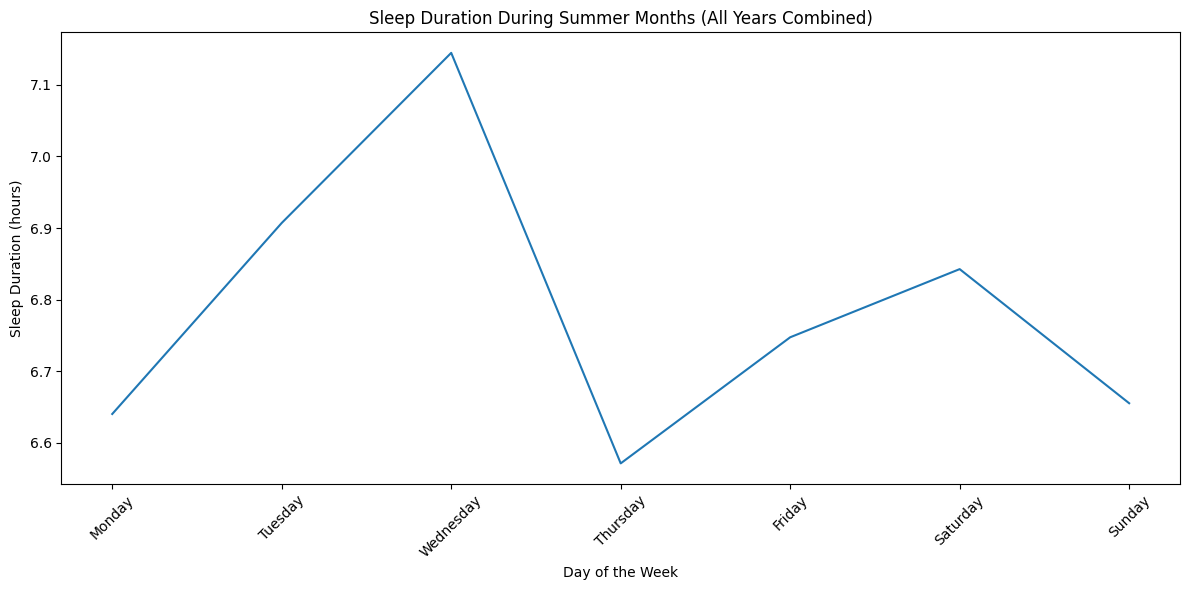

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Convert the 'Date' column to datetime
night_by_night_data['Date'] = pd.to_datetime(night_by_night_data.index)

# Extracting the day of the week and sleep duration
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['Sleep_Duration'] = night_by_night_data['Sleep Duration']

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 6) | (night_by_night_data['Month'] <= 9)]

# Creating a line chart for sleep duration during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Sleep_Duration',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('Sleep Duration During Summer Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('Sleep Duration (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.tight_layout()
plt.show()


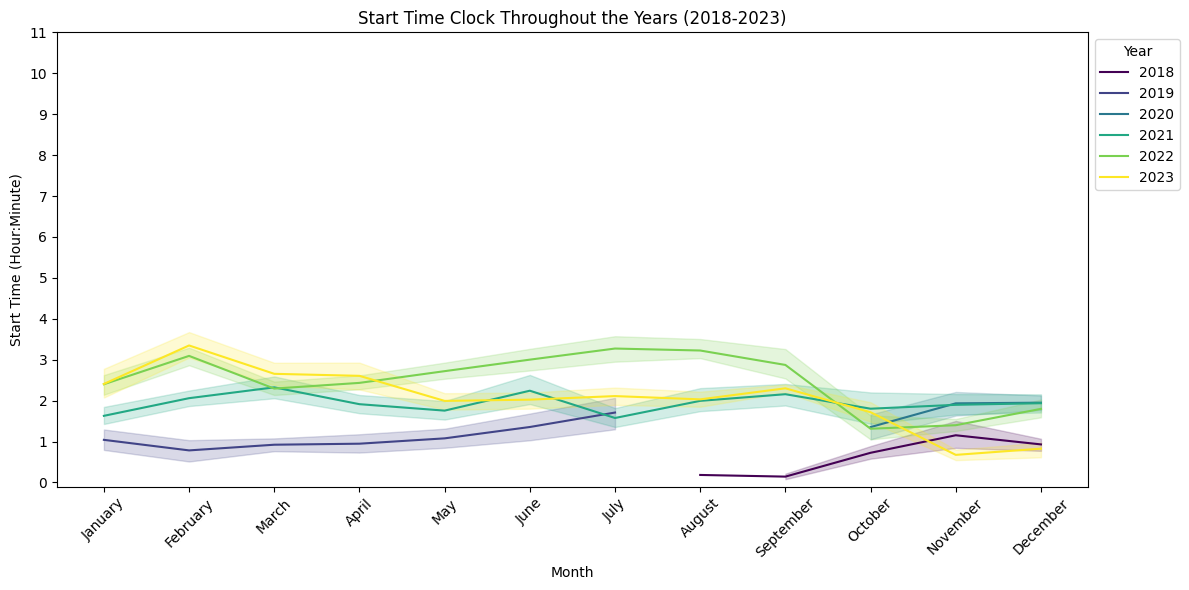

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['Start Time'].dt.strftime('%p')
night_by_night_data['Hour_24S'] = night_by_night_data['Start Time'].dt.hour + night_by_night_data['Start Time'].dt.minute / 60

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24S', hue='Year',  markers=True, 
    data=night_by_night_data, markersize=8, palette='viridis'
)

plt.title('Start Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour:Minute)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)

# Format y-axis to show only hours
plt.yticks(range(0, 12))

plt.tight_layout()
plt.show()


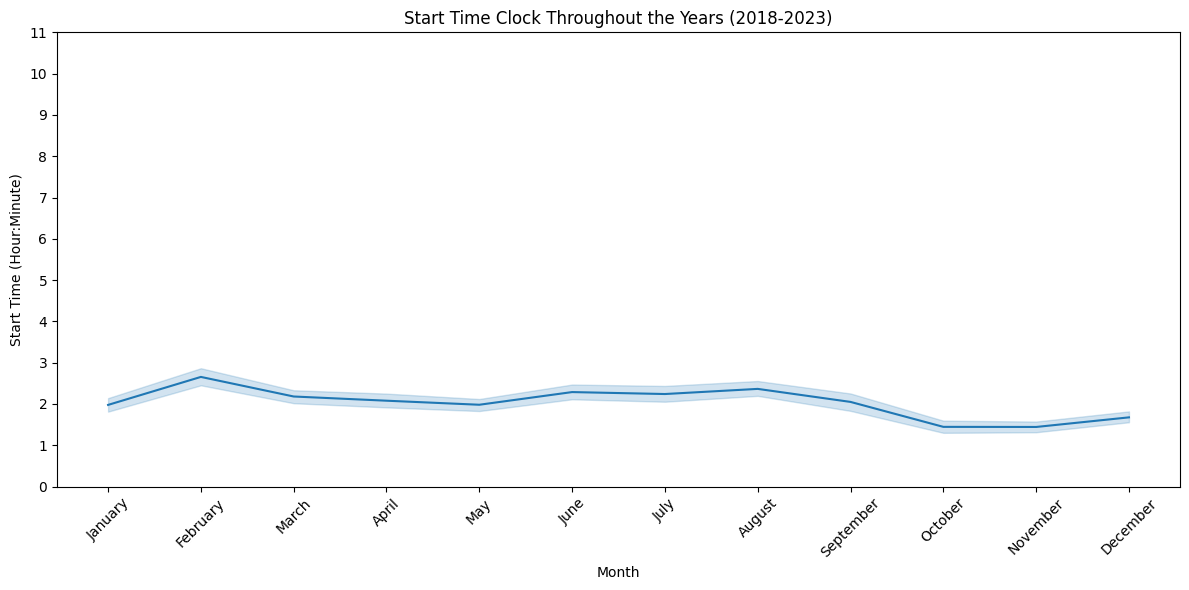

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Assuming you have already executed the previous code to get night_by_night_data

# Map hour to AM/PM and use a 24-hour clock
night_by_night_data['AM_PM'] = night_by_night_data['Start Time'].dt.strftime('%p')
night_by_night_data['Hour_24S'] = night_by_night_data['Start Time'].dt.hour + night_by_night_data['Start Time'].dt.minute / 60

# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month', y='Hour_24S',markers=True, 
    data=night_by_night_data, markersize=8, 
)

plt.title('Start Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Month')
plt.ylabel('Start Time (Hour:Minute)')

plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45)

# Format y-axis to show only hours
plt.yticks(range(0, 12))

plt.tight_layout()
plt.show()


In [27]:
display(school_months_data)

,Start Time,End Time,Category Value,Sleep Duration,Date,Year,Month,Hour,AM_PM,Hour_24S,Hour_24,Day_of_Week,Sleep_Duration,Start_Hour
Date,,,,,,,,,,,,,,
2018-08-31,2018-08-31 00:11:32,2018-08-31 08:00:36,HKCategoryValueSleepAnalysisInBed,7.817778,2018-08-31,2018,8,0,AM,00,8.000000,Friday,7.817778,0
2018-09-01,2018-09-01 00:00:00,2018-09-01 08:00:56,HKCategoryValueSleepAnalysisInBed,8.015556,2018-09-01,2018,9,0,AM,00,8.000000,Saturday,8.015556,0
2018-09-02,2018-09-02 00:12:56,2018-09-02 08:00:14,HKCategoryValueSleepAnalysisInBed,7.788333,2018-09-02,2018,9,0,AM,00,8.000000,Sunday,7.788333,0
2018-09-03,2018-09-03 00:16:24,2018-09-03 08:00:20,HKCategoryValueSleepAnalysisInBed,7.732222,2018-09-03,2018,9,0,AM,00,8.000000,Monday,7.732222,0
2018-09-04,2018-09-04 00:13:20,2018-09-04 08:01:59,HKCategoryValueSleepAnalysisInBed,7.810833,2018-09-04,2018,9,0,AM,00,8.016667,Tuesday,7.810833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-04,2023-12-04 00:58:39,2023-12-04 08:02:26,HKCategoryValueSleepAnalysisInBed,7.063056,2023-12-04,2023,12,0,AM,00,8.033333,Monday,7.063056,0
2023-12-06,2023-12-06 00:14:51,2023-12-06 10:12:51,HKCategoryValueSleepAnalysisInBed,9.966667,2023-12-06,2023,12,0,AM,00,10.200000,Wednesday,9.966667,0
2023-12-07,2023-12-07 00:58:27,2023-12-07 09:31:06,HKCategoryValueSleepAnalysisInBed,8.544167,2023-12-07,2023,12,0,AM,00,9.516667,Thursday,8.544167,0


In [28]:
display(night_by_night_data[(night_by_night_data['Year'] == 2022) & (night_by_night_data['Month'] == 5)] )

,Start Time,End Time,Category Value,Sleep Duration,Date,Year,Month,Hour,AM_PM,Hour_24S,Hour_24,Day_of_Week,Sleep_Duration,Start_Hour
Date,,,,,,,,,,,,,,
2022-05-01,2022-05-01 03:08:55,2022-05-01 09:30:00,HKCategoryValueSleepAnalysisInBed,6.351389,2022-05-01,2022,5,3,AM,3.133333,9.500000,Sunday,6.351389,3
2022-05-02,2022-05-02 03:12:13,2022-05-02 09:30:01,HKCategoryValueSleepAnalysisInBed,6.296667,2022-05-02,2022,5,3,AM,3.200000,9.500000,Monday,6.296667,3
2022-05-03,2022-05-03 02:12:30,2022-05-03 09:30:01,HKCategoryValueSleepAnalysisInBed,7.291944,2022-05-03,2022,5,2,AM,2.200000,9.500000,Tuesday,7.291944,2
2022-05-04,2022-05-04 03:00:32,2022-05-04 09:30:02,HKCategoryValueSleepAnalysisInBed,6.491667,2022-05-04,2022,5,3,AM,3.000000,9.500000,Wednesday,6.491667,3
2022-05-05,2022-05-05 03:28:16,2022-05-05 09:30:00,HKCategoryValueSleepAnalysisInBed,6.028889,2022-05-05,2022,5,3,AM,3.466667,9.500000,Thursday,6.028889,3
2022-05-06,2022-05-06 03:35:04,2022-05-06 09:30:02,HKCategoryValueSleepAnalysisInBed,5.916111,2022-05-06,2022,5,3,AM,3.583333,9.500000,Friday,5.916111,3
2022-05-07,2022-05-07 03:12:29,2022-05-07 09:30:02,HKCategoryValueSleepAnalysisInBed,6.292500,2022-05-07,2022,5,3,AM,3.200000,9.500000,Saturday,6.292500,3
2022-05-08,2022-05-08 02:50:25,2022-05-08 09:30:01,HKCategoryValueSleepAnalysisInBed,6.660000,2022-05-08,2022,5,2,AM,2.833333,9.500000,Sunday,6.660000,2
2022-05-09,2022-05-09 02:32:49,2022-05-09 06:06:14,HKCategoryValueSleepAnalysisInBed,3.556944,2022-05-09,2022,5,2,AM,2.533333,6.100000,Monday,3.556944,2


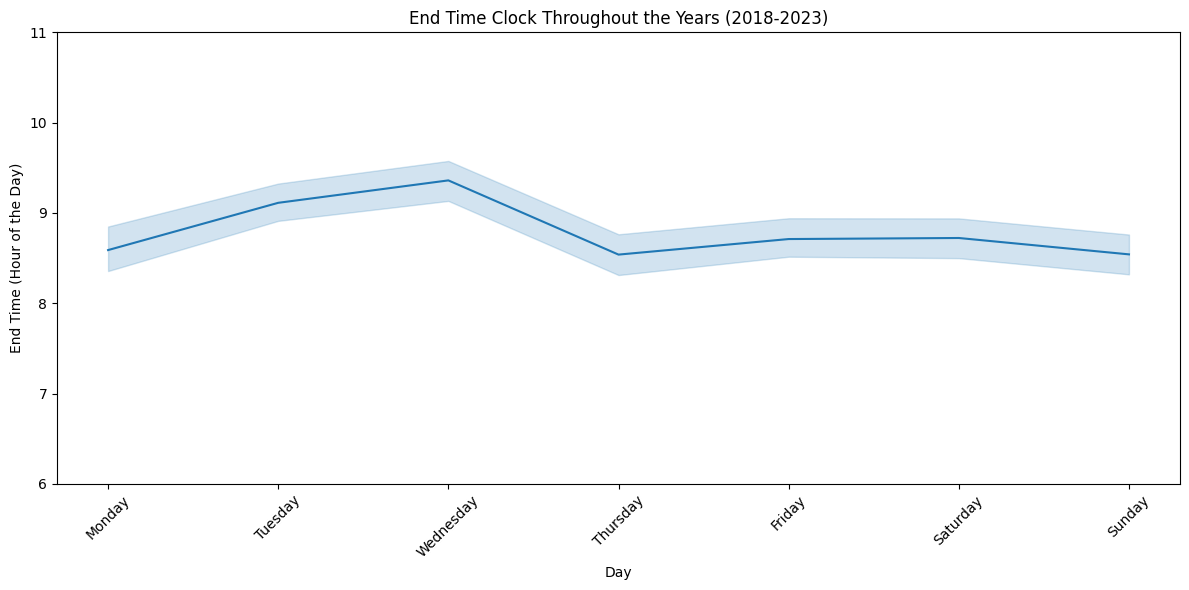

In [29]:
# Creating a line chart for the start time clock throughout the years using seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='Hour_24',  markers=True, 
    data=night_by_night_data, markersize=8, )

plt.title('End Time Clock Throughout the Years (2018-2023)')
plt.xlabel('Day')
plt.ylabel('End Time (Hour of the Day)')
#plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6,12))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()
#display(night_by_night_data)

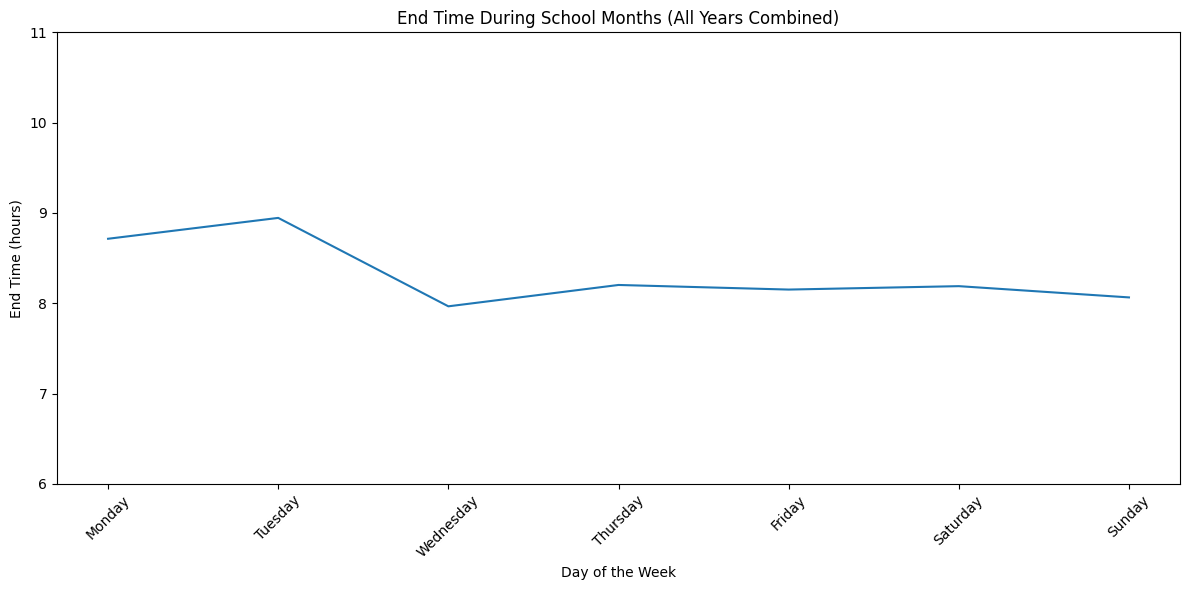

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


# Extracting the day of the week and start time in hours
night_by_night_data['Day_of_Week'] = night_by_night_data['Date'].dt.day_name()
night_by_night_data['End_Hour'] = night_by_night_data['End Time'].dt.hour

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 9) | (night_by_night_data['Month'] <= 5)]

# Creating a line chart for start time during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='End_Hour',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('End Time During School Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('End Time (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6,12))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()


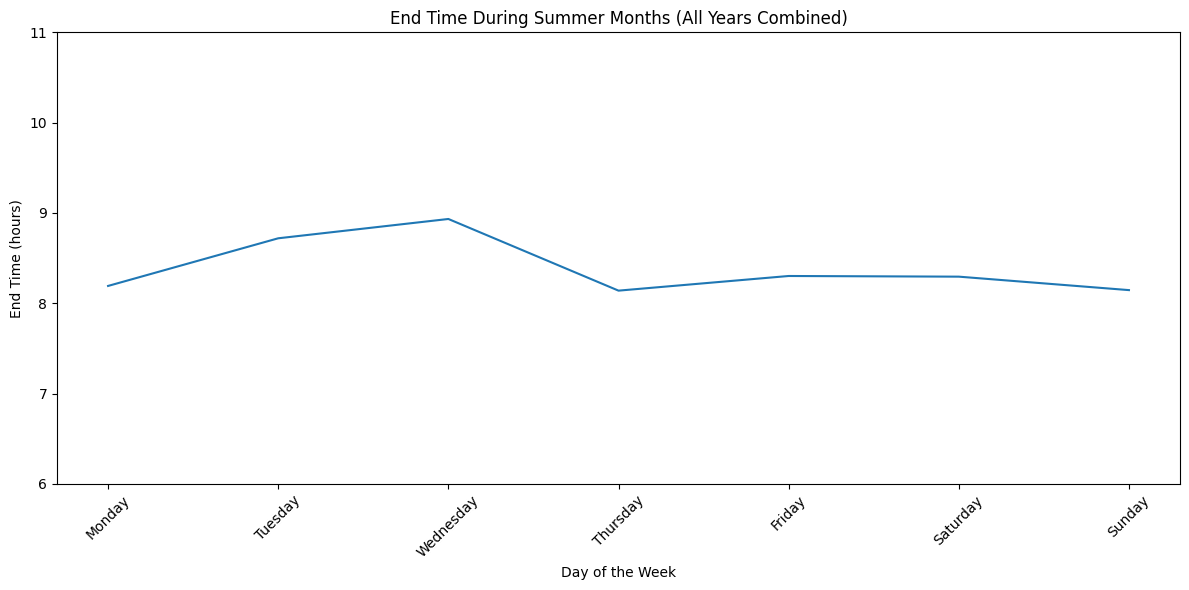

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Filter for school months (e.g., September to May)
school_months_data = night_by_night_data[(night_by_night_data['Month'] >= 6) | (night_by_night_data['Month'] <= 10)]

# Creating a line chart for start time during school months (all years combined)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Day_of_Week', y='End_Hour',
    data=school_months_data, markers=True, markersize=8, err_style=None
)

plt.title('End Time During Summer Months (All Years Combined)')
plt.xlabel('Day of the Week')
plt.ylabel('End Time (hours)')
plt.xticks(range(7), calendar.day_name, rotation=45)
plt.yticks(range(6,12))  # Set y-axis ticks for 24 hours
plt.tight_layout()
plt.show()
